dataset source: https://data.worldbank.org/country/US <br>
https://data.oecd.org/lprdty/labour-compensation-per-hour-worked.htm#indicator-chart <br>
http://fred.stlouisfed.org/series/CSUSHPISA <br>

In [1]:
import pandas as pd
import glob
import os

# Data Structuring

In [2]:
path = r"C:\Users\srish\INTERNSHIP ASSIGNMENT HOMELLC"
all_files = glob.glob(os.path.join(path, '*.csv'))

In [3]:
print(all_files)

['C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\electricity_access_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\foreign_direct_investment_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\forest_area_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\gdp_growth_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\gdp_per_capita_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\gdp_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\inflation_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\interest_rate_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\net_migration_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\population_growth_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\population_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHIP ASSIGNMENT HOMELLC\\unemployment_WorldBank1.csv', 'C:\\Users\\srish\\INTERNSHI

In [4]:
dfs = []
for filename in all_files:
    df = pd.read_csv(filename)
    df.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1, inplace = True)
    dfs.append(df)

In [5]:
#dfs

In [6]:
us_data = []
for df in dfs:
    us_data.append(df.loc[df['Country Name'] == 'United States'])

In [7]:
#us_data

In [8]:
us_data[0]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
251,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN


In [9]:
for i in range(len(us_data)):
    us_data[i].reset_index(drop = True, inplace = True)
    us_data[i].drop(['Country Name'], axis = 1, inplace = True)

C:\Users\srish\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
us_data[0]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN


In [11]:
us_data[1]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.710668,1.435021,2.809148,2.537498,1.955211,1.045704,1.477875,0.65698,2.114876,1.524104


In [12]:
us_df = pd.concat(us_data).transpose().reset_index()

In [13]:
us_df.columns = ['year', 'electricity_access', 'foreign_direct_investment', 'forest_area', 'gdp_growth', 'gdp_per_capita', 'gdp', 'inflation',' interest_rate', 'net_migration', 'population_growth', 'population', 'unemployment', 'urban_land_area', 'urban_population']

In [14]:
us_df

,year,electricity_access,foreign_direct_investment,forest_area,gdp_growth,gdp_per_capita,gdp,inflation,interest_rate,net_migration,population_growth,population,unemployment,urban_land_area,urban_population
0,1960,NaN,NaN,NaN,NaN,3007.123445,5.433000e+11,1.457976,NaN,583458.0,NaN,180671000.0,NaN,NaN,69.996
1,1961,NaN,NaN,NaN,2.300000,3066.562869,5.633000e+11,1.070724,3.107885,541424.0,1.657730,183691000.0,NaN,NaN,70.377
2,1962,NaN,NaN,NaN,6.100000,3243.843078,6.051000e+11,1.198773,3.215346,549734.0,1.537997,186538000.0,NaN,NaN,70.757
3,1963,NaN,NaN,NaN,4.400000,3374.515171,6.386000e+11,1.239669,3.374882,588381.0,1.439165,189242000.0,NaN,NaN,71.134
4,1964,NaN,NaN,NaN,5.800000,3573.941185,6.858000e+11,1.278912,2.951669,501115.0,1.389046,191889000.0,NaN,NaN,71.508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,100.0,1.045704,33.866926,2.945385,62823.309440,2.053306e+13,2.442583,2.441415,1200796.0,0.526435,326838199.0,3.900,NaN,82.256
59,2019,100.0,1.477875,33.866926,2.294439,65120.394660,2.138098e+13,1.812210,3.427090,1158444.0,0.455381,328329953.0,3.670,NaN,82.459
60,2020,100.0,0.656980,33.866926,-2.767803,63528.634300,2.106047e+13,1.233584,2.210411,675560.0,0.964348,331511512.0,8.050,NaN,82.664
61,2021,100.0,2.114876,33.866926,5.945485,70219.472450,2.331508e+13,4.697859,-1.189357,561580.0,0.156747,332031554.0,5.350,NaN,82.873


In [15]:
labor_compensation = pd.read_csv('labor_compensation_per_hour/labor_compensation_per_hour.csv')
labor_compensation.shape

(1314, 8)

In [16]:
labor_compensation

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,LABCOMP,TOT,AGRWTH,A,1986,5.168118,NaN
1,AUS,LABCOMP,TOT,AGRWTH,A,1987,5.915590,NaN
2,AUS,LABCOMP,TOT,AGRWTH,A,1988,7.255069,NaN
3,AUS,LABCOMP,TOT,AGRWTH,A,1989,5.978699,NaN
4,AUS,LABCOMP,TOT,AGRWTH,A,1990,6.079851,NaN
...,...,...,...,...,...,...,...,...
1309,EU27_2020,LABCOMP,TOT,AGRWTH,A,2018,2.472725,NaN
1310,EU27_2020,LABCOMP,TOT,AGRWTH,A,2019,2.833858,NaN
1311,EU27_2020,LABCOMP,TOT,AGRWTH,A,2020,5.123775,NaN
1312,EU27_2020,LABCOMP,TOT,AGRWTH,A,2021,0.684970,NaN


In [17]:
labor_compensation.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis = 1,  inplace = True)
labor_compensation

,LOCATION,TIME,Value
0,AUS,1986,5.168118
1,AUS,1987,5.915590
2,AUS,1988,7.255069
3,AUS,1989,5.978699
4,AUS,1990,6.079851
...,...,...,...
1309,EU27_2020,2018,2.472725
1310,EU27_2020,2019,2.833858
1311,EU27_2020,2020,5.123775
1312,EU27_2020,2021,0.684970


In [18]:
labor_compensation = labor_compensation.loc[labor_compensation['LOCATION'] == 'USA']
labor_compensation

,LOCATION,TIME,Value
777,USA,1971,7.277519
778,USA,1972,6.860820
779,USA,1973,6.548242
780,USA,1974,9.069008
781,USA,1975,9.675017
782,USA,1976,7.572606
783,USA,1977,7.576194
784,USA,1978,7.980404
785,USA,1979,9.052267
786,USA,1980,10.474324


In [19]:
labor_compensation.drop('LOCATION', axis = 1, inplace = True)

C:\Users\srish\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
labor_compensation.reset_index(drop = True, inplace = True)

In [21]:
labor_compensation.columns = ['year', 'labor_compensation_per_hour']

In [22]:
labor_compensation

,year,labor_compensation_per_hour
0,1971,7.277519
1,1972,6.860820
2,1973,6.548242
3,1974,9.069008
4,1975,9.675017
5,1976,7.572606
6,1977,7.576194
7,1978,7.980404
8,1979,9.052267
9,1980,10.474324


In [23]:
us_df['year'] = us_df['year'].astype(int)

In [24]:
us_df = us_df.merge(labor_compensation[['year', 'labor_compensation_per_hour']], on = 'year', how = 'left')

In [25]:
us_df

,year,electricity_access,foreign_direct_investment,forest_area,gdp_growth,gdp_per_capita,gdp,inflation,interest_rate,net_migration,population_growth,population,unemployment,urban_land_area,urban_population,labor_compensation_per_hour
0,1960,NaN,NaN,NaN,NaN,3007.123445,5.433000e+11,1.457976,NaN,583458.0,NaN,180671000.0,NaN,NaN,69.996,NaN
1,1961,NaN,NaN,NaN,2.300000,3066.562869,5.633000e+11,1.070724,3.107885,541424.0,1.657730,183691000.0,NaN,NaN,70.377,NaN
2,1962,NaN,NaN,NaN,6.100000,3243.843078,6.051000e+11,1.198773,3.215346,549734.0,1.537997,186538000.0,NaN,NaN,70.757,NaN
3,1963,NaN,NaN,NaN,4.400000,3374.515171,6.386000e+11,1.239669,3.374882,588381.0,1.439165,189242000.0,NaN,NaN,71.134,NaN
4,1964,NaN,NaN,NaN,5.800000,3573.941185,6.858000e+11,1.278912,2.951669,501115.0,1.389046,191889000.0,NaN,NaN,71.508,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,100.0,1.045704,33.866926,2.945385,62823.309440,2.053306e+13,2.442583,2.441415,1200796.0,0.526435,326838199.0,3.900,NaN,82.256,3.285620
59,2019,100.0,1.477875,33.866926,2.294439,65120.394660,2.138098e+13,1.812210,3.427090,1158444.0,0.455381,328329953.0,3.670,NaN,82.459,3.195345
60,2020,100.0,0.656980,33.866926,-2.767803,63528.634300,2.106047e+13,1.233584,2.210411,675560.0,0.964348,331511512.0,8.050,NaN,82.664,7.151292
61,2021,100.0,2.114876,33.866926,5.945485,70219.472450,2.331508e+13,4.697859,-1.189357,561580.0,0.156747,332031554.0,5.350,NaN,82.873,3.841270


In [26]:
target = pd.read_csv('target/CSUSHPISA.csv')
target

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
435,2023-04-01,300.198
436,2023-05-01,302.620
437,2023-06-01,304.651
438,2023-07-01,306.634


In [27]:
target.columns = ['year', 'house_price']

In [28]:
target['year'] = pd.to_datetime(target['year']).dt.strftime('%Y')

In [29]:
target = target.groupby('year', as_index = False)['house_price'].mean()

In [30]:
target['year'] = target['year'].astype(int)

In [31]:
target

,year,house_price
0,1987,66.251500
1,1988,71.134833
2,1989,75.502750
3,1990,76.936417
4,1991,75.922167
5,1992,76.328500
6,1993,77.413083
7,1994,79.467833
8,1995,80.991417
9,1996,82.807333


In [32]:
us_df = us_df.merge(target[['year', 'house_price']], on = 'year', how = 'left')
us_df

,year,electricity_access,foreign_direct_investment,forest_area,gdp_growth,gdp_per_capita,gdp,inflation,interest_rate,net_migration,population_growth,population,unemployment,urban_land_area,urban_population,labor_compensation_per_hour,house_price
0,1960,NaN,NaN,NaN,NaN,3007.123445,5.433000e+11,1.457976,NaN,583458.0,NaN,180671000.0,NaN,NaN,69.996,NaN,NaN
1,1961,NaN,NaN,NaN,2.300000,3066.562869,5.633000e+11,1.070724,3.107885,541424.0,1.657730,183691000.0,NaN,NaN,70.377,NaN,NaN
2,1962,NaN,NaN,NaN,6.100000,3243.843078,6.051000e+11,1.198773,3.215346,549734.0,1.537997,186538000.0,NaN,NaN,70.757,NaN,NaN
3,1963,NaN,NaN,NaN,4.400000,3374.515171,6.386000e+11,1.239669,3.374882,588381.0,1.439165,189242000.0,NaN,NaN,71.134,NaN,NaN
4,1964,NaN,NaN,NaN,5.800000,3573.941185,6.858000e+11,1.278912,2.951669,501115.0,1.389046,191889000.0,NaN,NaN,71.508,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,100.0,1.045704,33.866926,2.945385,62823.309440,2.053306e+13,2.442583,2.441415,1200796.0,0.526435,326838199.0,3.900,NaN,82.256,3.285620,202.477750
59,2019,100.0,1.477875,33.866926,2.294439,65120.394660,2.138098e+13,1.812210,3.427090,1158444.0,0.455381,328329953.0,3.670,NaN,82.459,3.195345,209.465167
60,2020,100.0,0.656980,33.866926,-2.767803,63528.634300,2.106047e+13,1.233584,2.210411,675560.0,0.964348,331511512.0,8.050,NaN,82.664,7.151292,222.145833
61,2021,100.0,2.114876,33.866926,5.945485,70219.472450,2.331508e+13,4.697859,-1.189357,561580.0,0.156747,332031554.0,5.350,NaN,82.873,3.841270,260.049250


In [33]:
us_df.dropna(subset = ['house_price'], inplace = True)
us_df.reset_index(drop = True, inplace = True)

In [34]:
us_df

,year,electricity_access,foreign_direct_investment,forest_area,gdp_growth,gdp_per_capita,gdp,inflation,interest_rate,net_migration,population_growth,population,unemployment,urban_land_area,urban_population,labor_compensation_per_hour,house_price
0,1987,NaN,1.302414,NaN,3.459252,20038.94110,4.855215e+12,3.664563,5.592238,677547.0,0.893829,242289000.0,NaN,NaN,74.793,4.055938,66.251500
1,1988,NaN,1.086807,NaN,4.177061,21417.01193,5.236438e+12,4.077741,5.590382,759523.0,0.907999,244499000.0,NaN,NaN,74.942,5.468796,71.134833
2,1989,NaN,1.343241,NaN,3.672648,22857.15443,5.641580e+12,4.827003,6.690687,919737.0,0.944406,246819000.0,NaN,NaN,75.089,3.634369,75.502750
3,1990,100.0,1.194504,33.022308,1.885965,23888.60001,5.963144e+12,5.397956,6.039749,1421775.0,1.129651,249623000.0,NaN,3868.453742,75.300,5.604682,76.936417
4,1991,100.0,0.561047,33.034165,-0.108265,24342.25890,6.158129e+12,4.234964,4.915346,1569223.0,1.336261,252981000.0,6.800,NaN,75.701,5.539241,75.922167
5,1992,100.0,0.464854,33.046023,3.522441,25418.99078,6.520327e+12,3.028820,3.884238,1816509.0,1.386886,256514000.0,7.500,NaN,76.097,5.749684,76.328500
6,1993,100.0,0.732370,33.057880,2.751781,26387.29373,6.858559e+12,2.951657,3.545617,1752153.0,1.318680,259919000.0,6.900,NaN,76.488,1.913981,77.413083
7,1994,100.0,0.767644,33.069737,4.028793,27694.85342,7.287236e+12,2.607442,4.898310,1806698.0,1.226296,263126000.0,6.120,NaN,76.875,2.131697,79.467833
8,1995,100.0,0.904218,33.081594,2.684217,28690.87570,7.639749e+12,2.805420,6.593996,1678815.0,1.190787,266278000.0,5.650,NaN,77.257,2.076316,80.991417
9,1996,100.0,1.209693,33.093452,3.772565,29967.71272,8.073122e+12,2.931204,6.324074,1771618.0,1.163412,269394000.0,5.450,NaN,77.636,3.901417,82.807333


# Data Cleaning

In [35]:
us_df.drop(['electricity_access', 'urban_land_area'], axis = 1, inplace = True)
us_df

,year,foreign_direct_investment,forest_area,gdp_growth,gdp_per_capita,gdp,inflation,interest_rate,net_migration,population_growth,population,unemployment,urban_population,labor_compensation_per_hour,house_price
0,1987,1.302414,NaN,3.459252,20038.94110,4.855215e+12,3.664563,5.592238,677547.0,0.893829,242289000.0,NaN,74.793,4.055938,66.251500
1,1988,1.086807,NaN,4.177061,21417.01193,5.236438e+12,4.077741,5.590382,759523.0,0.907999,244499000.0,NaN,74.942,5.468796,71.134833
2,1989,1.343241,NaN,3.672648,22857.15443,5.641580e+12,4.827003,6.690687,919737.0,0.944406,246819000.0,NaN,75.089,3.634369,75.502750
3,1990,1.194504,33.022308,1.885965,23888.60001,5.963144e+12,5.397956,6.039749,1421775.0,1.129651,249623000.0,NaN,75.300,5.604682,76.936417
4,1991,0.561047,33.034165,-0.108265,24342.25890,6.158129e+12,4.234964,4.915346,1569223.0,1.336261,252981000.0,6.800,75.701,5.539241,75.922167
5,1992,0.464854,33.046023,3.522441,25418.99078,6.520327e+12,3.028820,3.884238,1816509.0,1.386886,256514000.0,7.500,76.097,5.749684,76.328500
6,1993,0.732370,33.057880,2.751781,26387.29373,6.858559e+12,2.951657,3.545617,1752153.0,1.318680,259919000.0,6.900,76.488,1.913981,77.413083
7,1994,0.767644,33.069737,4.028793,27694.85342,7.287236e+12,2.607442,4.898310,1806698.0,1.226296,263126000.0,6.120,76.875,2.131697,79.467833
8,1995,0.904218,33.081594,2.684217,28690.87570,7.639749e+12,2.805420,6.593996,1678815.0,1.190787,266278000.0,5.650,77.257,2.076316,80.991417
9,1996,1.209693,33.093452,3.772565,29967.71272,8.073122e+12,2.931204,6.324074,1771618.0,1.163412,269394000.0,5.450,77.636,3.901417,82.807333


# Data Visualization

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

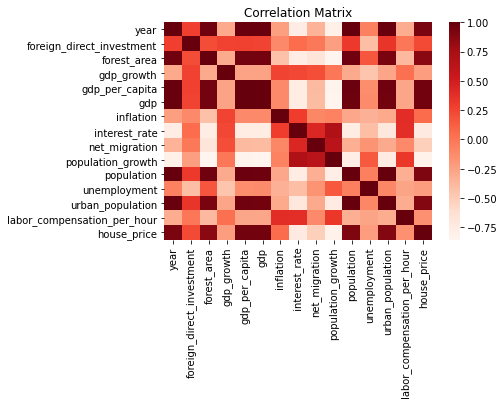

In [37]:
sns.heatmap(us_df.corr(), cmap = 'Reds')
plt.title('Correlation Matrix')

In [38]:
us_df.corr()['house_price']

year                           0.924388
foreign_direct_investment      0.228486
forest_area                    0.862973
gdp_growth                    -0.223153
gdp_per_capita                 0.960308
gdp                            0.957921
inflation                      0.061471
 interest_rate                -0.726484
net_migration                 -0.518132
population_growth             -0.816132
population                     0.906017
unemployment                  -0.220366
urban_population               0.898216
labor_compensation_per_hour   -0.152309
house_price                    1.000000
Name: house_price, dtype: float64

<AxesSubplot:title={'center':'forest_area vs. house_price'}, xlabel='forest_area', ylabel='house_price'>

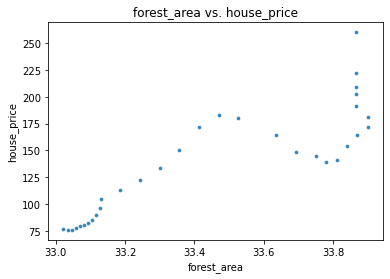

In [39]:
plt.title('forest_area vs. house_price')
sns.scatterplot(data = us_df, x = 'forest_area', y = 'house_price', alpha = 0.9, s = 15)

<AxesSubplot:title={'center':'gdp vs. house_price'}, xlabel='gdp', ylabel='house_price'>

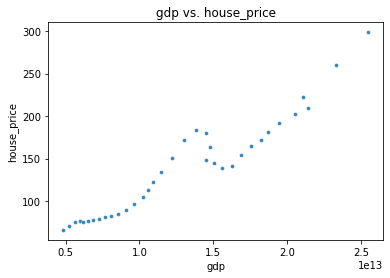

In [40]:
plt.title('gdp vs. house_price')
sns.scatterplot(data = us_df, x = 'gdp', y = 'house_price', alpha = 0.9, s = 15)

<AxesSubplot:title={'center':'inflation vs. house_price'}, xlabel='inflation', ylabel='house_price'>

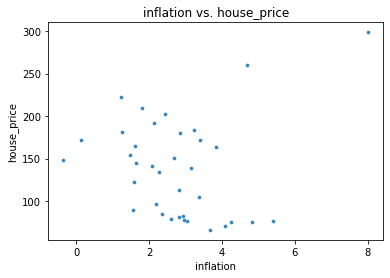

In [41]:
plt.title('inflation vs. house_price')
sns.scatterplot(data = us_df, x = 'inflation', y = 'house_price', alpha = 0.9, s = 15)

<AxesSubplot:title={'center':'population_growth vs. house_price'}, xlabel='population_growth', ylabel='house_price'>

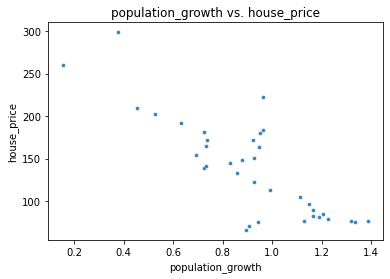

In [42]:
plt.title('population_growth vs. house_price')
sns.scatterplot(data = us_df, x = 'population_growth', y = 'house_price', alpha = 0.9, s = 15)

<AxesSubplot:title={'center':'net_migration vs. house_price'}, xlabel='net_migration', ylabel='house_price'>

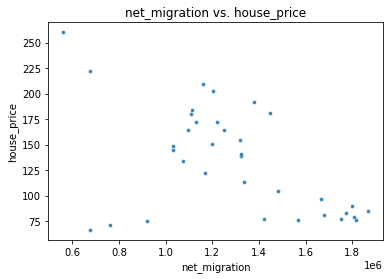

In [43]:
plt.title('net_migration vs. house_price')
sns.scatterplot(data = us_df, x = 'net_migration', y = 'house_price', alpha = 0.9, s = 15)

<AxesSubplot:title={'center':'interest_rate vs. house_price'}, xlabel=' interest_rate', ylabel='house_price'>

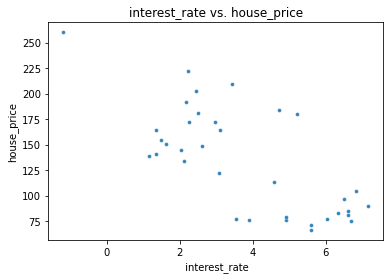

In [44]:
plt.title('interest_rate vs. house_price')
sns.scatterplot(data = us_df, x = ' interest_rate', y = 'house_price', alpha = 0.9, s = 15)

<AxesSubplot:title={'center':'unemployment vs. house_price'}, xlabel='unemployment', ylabel='house_price'>

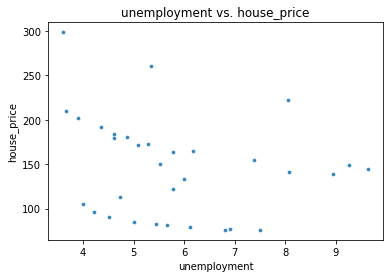

In [45]:
plt.title('unemployment vs. house_price')
sns.scatterplot(data = us_df, x = 'unemployment', y = 'house_price', alpha = 0.9, s = 15)

<AxesSubplot:title={'center':'labor_compensation_per_hour vs. house_price'}, xlabel='labor_compensation_per_hour', ylabel='house_price'>

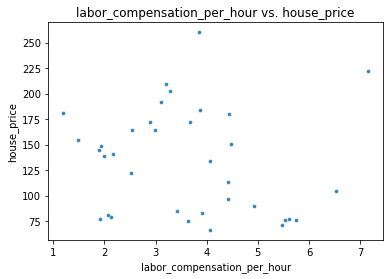

In [46]:
plt.title('labor_compensation_per_hour vs. house_price')
sns.scatterplot(data = us_df, x = 'labor_compensation_per_hour', y = 'house_price', alpha = 0.9, s = 15)